In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
import regex as re
%matplotlib inline
import matplotlib
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
# Display all columns
pd.set_option('display.max_columns', None)
import plotly.express as px


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Codebasics/ChurnData.csv')
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1745,2418-TPEUN,Female,0,Yes,Yes,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1119.9,No
1988,3424-NMNBO,Male,1,Yes,No,58,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,108.85,6287.25,Yes
2298,6670-MFRPK,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Two year,Yes,Credit card (automatic),79.20,5420.65,No
2135,4010-YLMVT,Female,0,No,No,56,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),106.60,5893.95,No


In [3]:
#data Preparation and Cleaning

In [4]:
for column in df:
  print(f'{column}: {df[column].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [5]:
df.drop(columns = 'customerID', inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [8]:
df.shape

(7043, 20)

In [9]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [10]:
df['gender'] = df['gender'].map({'Female':0, 'Male':1})

In [11]:
# No internet Service and No phone Service is equivalent to No so replace it
for column in df:
  if ('No internet service' in df[column].unique()) or ('No phone service' in df[column].unique()):
    df[column] = df[column].replace('No internet service', 'No')
    df[column] = df[column].replace('No phone service', 'No')

In [12]:
for column in df:
  if (list(df[column].unique()) == ['No', 'Yes']) or (list(df[column].unique()) == ['Yes', 'No']):
    df[column] = df[column].map({'No':0, 'Yes':1})

In [13]:
df.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0


In [14]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df = df[~(df['TotalCharges'] == ' ')]

In [16]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<ipython-input-16-bbadf50202b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


In [17]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6457,1,0,1,1,17,0,0,DSL,1,0,1,0,1,0,One year,0,Credit card (automatic),44.45,792.15,0
3213,0,0,1,1,41,0,0,DSL,1,0,1,0,0,0,One year,0,Credit card (automatic),35.40,1412.40,0
6843,0,0,1,0,9,1,1,Fiber optic,1,1,1,0,0,0,Month-to-month,0,Bank transfer (automatic),91.75,865.80,1
696,1,0,1,0,72,1,1,DSL,0,1,1,1,1,1,Two year,1,Bank transfer (automatic),85.15,6316.20,0


In [18]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


In [19]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


In [20]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [21]:
df2 = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'])
for column in df2.columns:
    if df2[column].dtype == 'bool':
        df2[column] = df2[column].astype(int)


In [22]:
fig = px.histogram(df2, x = 'tenure', color = 'Churn', barmode = 'group', width = 800, height = 500, nbins = 25)
fig.update_layout(
    xaxis_title="Tenure",
    yaxis_title="Customer Count",
    title="Distribution of Tenure by Churn"
)
fig.show()

In [23]:
fig = px.histogram(df2, x = 'MonthlyCharges', color = 'Churn', barmode = 'group', width = 800, height = 500, nbins = 25)
fig.update_layout(
    xaxis_title="Monthly Charges (£)",
    yaxis_title="Customer Count",
    title="Distribution of Monthly Charges by Churn"
)
fig.show()

In [24]:
# Data Scaling

In [25]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [27]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols] = scaler.fit_transform(df2[cols])

In [28]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5528,1,0,1,0,0.605634,1,0,1,1,0,1,0,0,1,0.413930,0.298309,0,1,0,0,0,1,0,1,0,0,0
5794,1,1,1,0,1.000000,1,1,0,1,1,1,1,1,1,0.910448,0.913189,0,0,1,0,0,0,1,1,0,0,0
5823,0,0,0,0,0.295775,1,0,0,0,0,0,0,0,1,0.017910,0.052089,0,0,0,1,1,0,0,0,0,0,1
3635,0,0,1,0,1.000000,1,1,0,0,0,0,0,0,0,0.062687,0.199850,0,0,0,1,0,0,1,0,0,1,0


In [29]:
# imbalanced data
df2['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [30]:
#Neural Network Building

In [68]:
X = df2.drop(columns = 'Churn')
y = df2['Churn']

In [71]:
# Handeling imbalanced data with SMOTE
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [72]:
X.shape

(10326, 26)

In [74]:
y.value_counts()

,count
Churn,
0,5163
1,5163


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [76]:
X_train.shape

(8260, 26)

In [77]:
X_test.shape

(2066, 26)

In [78]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5589,0,0,1,1,0.760563,1,0,0,0,0,0,0,0,0,0.008955,0.113005,0,0,1,0,1,0,0,1,0,0
7311,0,0,0,0,0.356848,1,0,1,0,0,0,0,0,0,0.428913,0.187777,1,0,0,1,0,0,0,1,0,0
5561,0,0,1,1,0.507042,1,1,0,1,1,0,0,1,1,0.765174,0.405498,0,1,0,1,0,0,0,0,1,0
39,0,0,0,0,0.140845,1,1,0,0,1,0,1,1,1,0.792040,0.125387,0,1,0,1,0,0,1,0,0,0
6828,0,0,0,0,0.140845,1,1,0,0,1,0,1,1,1,0.820896,0.128196,0,1,0,1,0,0,0,0,1,0


In [79]:
y_train.head()

,Churn
5589,0
7311,1
5561,0
39,1
6828,1


In [80]:
len(X_train.columns)

26

In [81]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'accuracy',
                               patience = 3,
                               restore_best_weights = True)

In [82]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 50, callbacks = [early_stopping])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6662 - loss: 0.6070
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7747 - loss: 0.4698
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7815 - loss: 0.4578
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7853 - loss: 0.4570
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4363
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8001 - loss: 0.4279
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7955 - loss: 0.4364
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8066 - loss: 0.4247
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8076 - loss: 0.4214
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8049 - loss: 0.4232
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8037 - loss: 0.4225
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [83]:
model.evaluate(X_test, y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.4370


[0.4454498291015625, 0.7860600352287292]

In [84]:
y_pred = model.predict(X_test)
y_pred[0:5]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.75359464],
       [0.11315763],
       [0.44439024],
       [0.0103597 ],
       [0.9824805 ]], dtype=float32)

In [85]:
y_test[0:5]

,Churn
6968,0
3991,0
128,0
5096,0
7942,1


In [86]:
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [87]:
y_pred[0:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1033
           1       0.76      0.84      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



<Axes: >

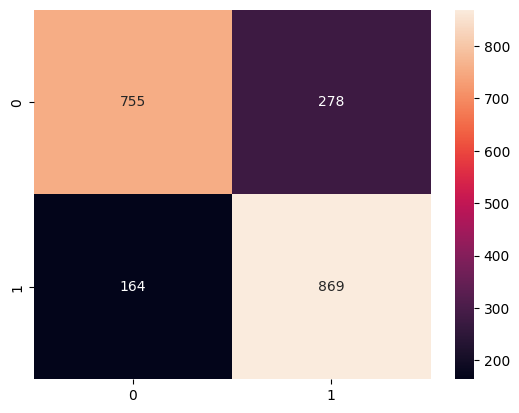

In [89]:
# build me a confusion matrix using seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')